In [3]:
import os
from wav2letter import datasets
from wav2letter import manifest

data_dir = manifest['data_dir']
train_manifest = manifest['train_manifest']

manifest_file = os.path.join(data_dir, train_manifest)
adv_robust = False
norm_bound = 4
dataset = datasets.LibriSpeechDataset(manifest_file, adv_robust, norm_bound=norm_bound)

### Generating a $L_p$ bounded uniformly distributed random vector 

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import torch


def generate_lp_bounded_vector(n, p, eps, uniform=True):

    if uniform:
        random_vector = np.random.uniform(-1, 1, n)
    else:
        random_vector = np.random.randn(n)

    lp_norm = np.linalg.norm(random_vector, ord=p)

    # Normalize the vector to have Lp norm equal to B
    bounded_vector = (random_vector/lp_norm )*eps

    return torch.tensor(bounded_vector, dtype=torch.float32)



In [18]:
i = np.random.randint(500)
aud = dataset[i][0]

eps = 4
n = aud.shape[1]
p=2
delta = generate_lp_bounded_vector(n, p, eps)

noisy = aud + delta

In [19]:
from IPython.display import Audio
Audio(data=aud, rate=16000)

In [20]:
from IPython.display import Audio
Audio(data=noisy, rate=16000)

Text(0.5, 1.0, 'Noisy audio')

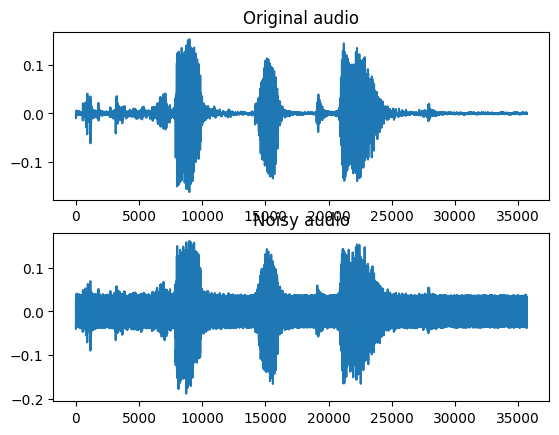

In [21]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(aud.squeeze())
ax[0].set_title("Original audio")
ax[1].plot(noisy.squeeze())
ax[1].set_title("Noisy audio")

### with gaussian noise...

In [25]:
i = np.random.randint(500)
aud = dataset[i][0]

eps = 4
n = aud.shape[1]
p=2
delta = generate_lp_bounded_vector(n, p, eps, uniform=False)

noisy = aud + delta

Text(0.5, 1.0, 'Noisy audio')

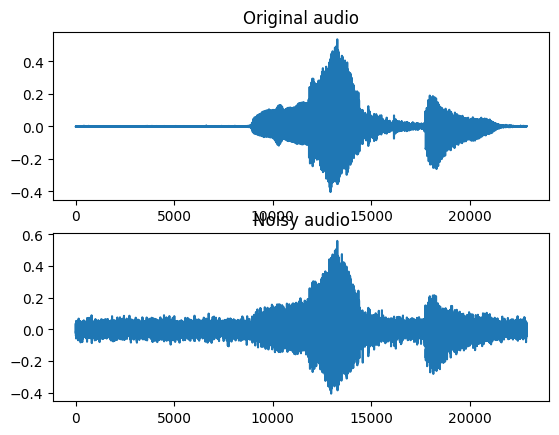

In [26]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(aud.squeeze())
ax[0].set_title("Original audio")
ax[1].plot(noisy.squeeze())
ax[1].set_title("Noisy audio")

In [28]:
from IPython.display import Audio
Audio(data=aud, rate=16000)

In [27]:
from IPython.display import Audio
Audio(data=noisy, rate=16000)